<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/MachineLearningAssignmentTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Your Name**  

## Standard Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Problem 1

### Reading the Data

In [18]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/MLA5/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/MLA5/landsat_test.csv')

### Statistical and Visual Exploration

<ipython-input-11-cddab510fd1f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=landsat_train, x='land_type', palette='viridis')
<ipython-input-11-cddab510fd1f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=landsat_test, x='land_type', palette='viridis')


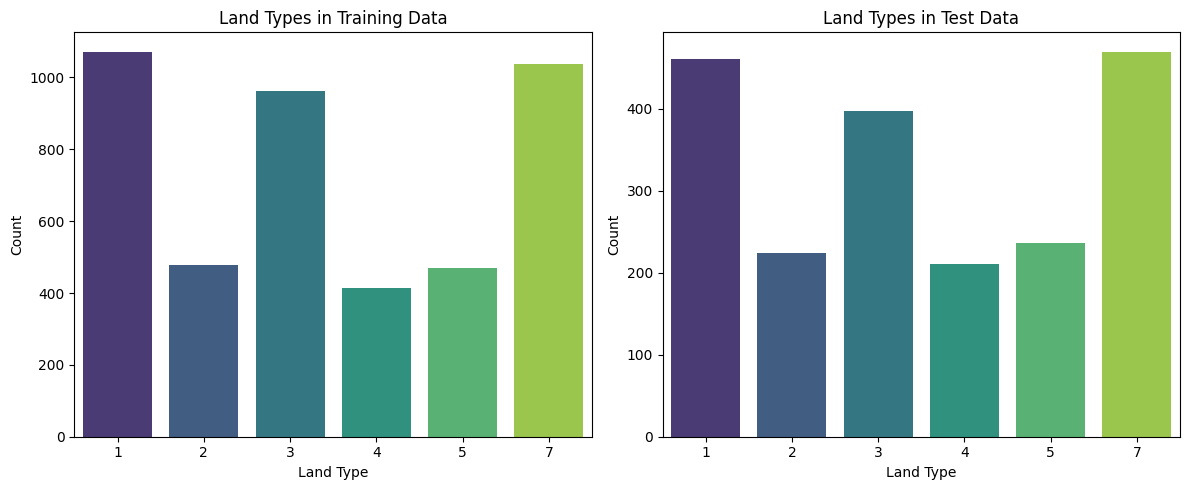

In [11]:
plt.figure(figsize=(12, 5))

# Bar plot for landsat_train
plt.subplot(1, 2, 1)
sns.countplot(data=landsat_train, x='land_type', palette='viridis')
plt.title('Land Types in Training Data')
plt.xlabel('Land Type')
plt.ylabel('Count')

# Bar plot for landsat_test
plt.subplot(1, 2, 2)
sns.countplot(data=landsat_test, x='land_type', palette='viridis')
plt.title('Land Types in Test Data')
plt.xlabel('Land Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Splitting Data into Train/Test

In [12]:
X_train = landsat_train.drop(columns=['land_type'])
y_train = landsat_train['land_type']
X_test = landsat_test.drop(columns=['land_type'])
y_test = landsat_test['land_type']

### Building the Pipeline

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), X_train.columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

### Executing the Model

In [15]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middl...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Evaluating Model

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.99      0.97      0.98       224
           3       0.89      0.95      0.92       397
           4       0.77      0.64      0.70       211
           5       0.92      0.91      0.91       237
           7       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



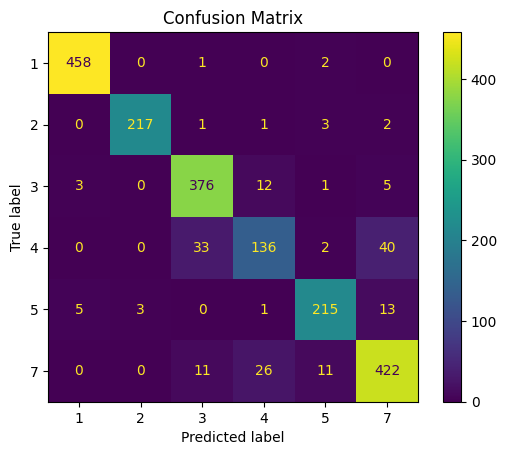

In [17]:
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

cm = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
cm.ax_.set_title('Confusion Matrix')
plt.show()

### Conclusion
The random forest model perform well indicated from the confusion matrix. It had an accuracy of 91%. Precision and recall are both pretty high from class 1 and class 2. But for class 4 the numbers go down, precision is .77 and recall is .64, which indicates that class is harder to classify correctly.

## Problem 2

### Reading the Data

In [19]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/MLA5/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/MLA5/landsat_test.csv')

### Visual Exploration

<ipython-input-23-cddab510fd1f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=landsat_train, x='land_type', palette='viridis')
<ipython-input-23-cddab510fd1f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=landsat_test, x='land_type', palette='viridis')


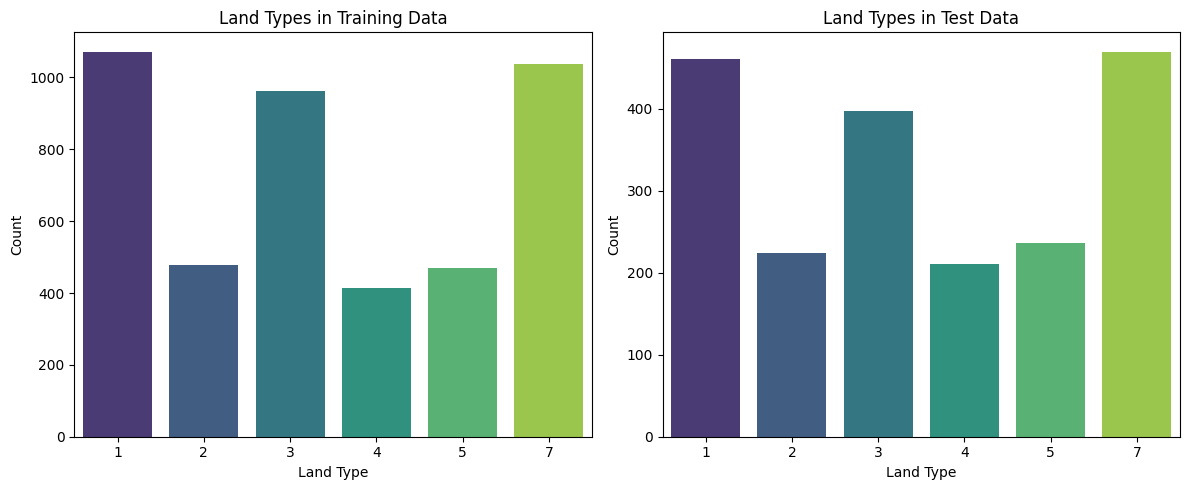

In [23]:
plt.figure(figsize=(12, 5))

# Bar plot for landsat_train
plt.subplot(1, 2, 1)
sns.countplot(data=landsat_train, x='land_type', palette='viridis')
plt.title('Land Types in Training Data')
plt.xlabel('Land Type')
plt.ylabel('Count')

# Bar plot for landsat_test
plt.subplot(1, 2, 2)
sns.countplot(data=landsat_test, x='land_type', palette='viridis')
plt.title('Land Types in Test Data')
plt.xlabel('Land Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Splitting Data into Train/Test

> Add blockquote



In [25]:
X_train = landsat_train.drop(columns=['land_type'])
y_train = landsat_train['land_type']
X_test = landsat_test.drop(columns=['land_type'])
y_test = landsat_test['land_type']

### Building the Pipeline

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), X_train.columns)
    ]
)

voting_classifier = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('lr', LogisticRegression(max_iter=1000)),
        ('gb', GradientBoostingClassifier(random_state=42))
    ],
    voting='hard'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', voting_classifier)
])

### Executing the Model

In [32]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middl...
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(random_state=42)),
                                              ('lr',
                                               LogisticRegression(max_iter=1000)),
                                              ('gb',
                                               GradientBoostingClassifier(random_state=42))]))])

### Evaluating Model

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.98      0.97      0.97       224
           3       0.87      0.95      0.91       397
           4       0.75      0.61      0.67       211
           5       0.92      0.86      0.89       237
           7       0.86      0.89      0.87       470

    accuracy                           0.90      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.90      0.90      0.90      2000



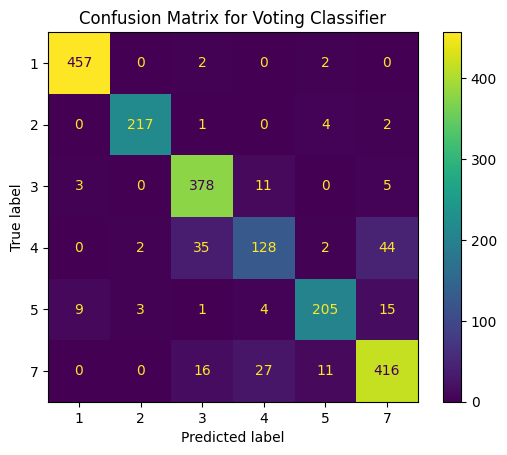

In [33]:
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

cm = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
cm.ax_.set_title('Confusion Matrix for Voting Classifier')
plt.show()

### Conclusion
The voting classifier achieved an accuracy of 90%. The precision and recall show that there is a very strong indiation between class 1 and class 2. CLass 4 still shows a lower recall and precision.

## Problem 3

### Reading the Data

In [38]:
banknote_data = pd.read_csv('/content/gdrive/MyDrive/MLA5/banknote_authentication.csv')
print(banknote_data.head())

   variance  skewness  curtosis  entropy  forgery
0   3.62160    8.6661   -2.8073 -0.44699        0
1   4.54590    8.1674   -2.4586 -1.46210        0
2   3.86600   -2.6383    1.9242  0.10645        0
3   3.45660    9.5228   -4.0112 -3.59440        0
4   0.32924   -4.4552    4.5718 -0.98880        0


### Visual Exploration

<ipython-input-43-bfdeb560d53b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=banknote_data, x='forgery', palette='viridis')


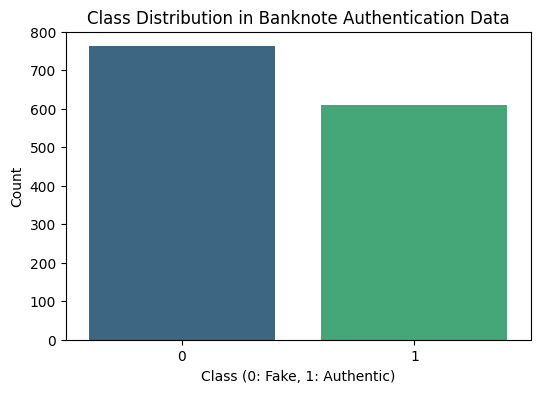

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(data=banknote_data, x='forgery', palette='viridis')
plt.title('Class Distribution in Banknote Authentication Data')
plt.xlabel('Class (0: Fake, 1: Authentic)')
plt.ylabel('Count')
plt.show()

### Splitting Data into Train/Test

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = banknote_data.drop(columns=['forgery'])
y = banknote_data['forgery']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), X_train.columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

### Executing the Model

In [49]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Evaluating Model

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



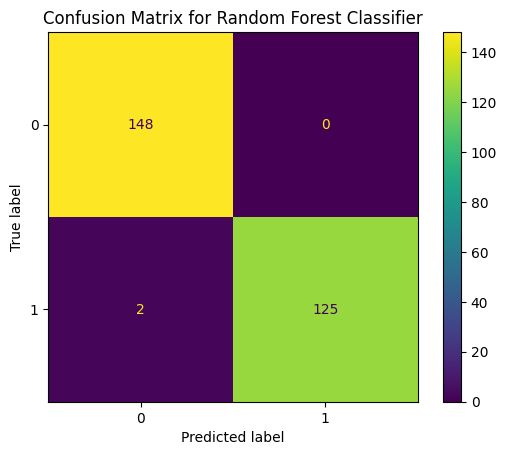

In [50]:
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

cm = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
cm.ax_.set_title('Confusion Matrix for Random Forest Classifier')
plt.show()


### Conclusion
The random forest classifier preformed very well for this data. It had an accuracy of 99% showing that precision has a very high reliability